# Splitting

## Initial split

In [95]:
import h5py
import pickle
from sklearn.model_selection import train_test_split
from utils import *

In [96]:
# Load the h5 file
file_path = '../data/dataoncosalud/res_valid/comp_env_data.h5'
with h5py.File(file_path, 'r') as h5_file:
    keys_list = list(h5_file.keys())

h5_len=len(keys_list)
keys_list = [f'file_{i}' for i in range(h5_len)]

In [97]:
train_data, temp_data = train_test_split(keys_list, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Output
print("Training Data:", train_data)
print("Validation Data:", val_data)
print("Test Data:", test_data)

data_splits={
    'train_files': train_data,  # 70%
    'val_files'  : val_data,    # 15%
    'test_files' : test_data    # 15%
}

Training Data: ['file_603', 'file_483', 'file_439', 'file_399', 'file_382', 'file_596', 'file_480', 'file_265', 'file_565', 'file_572', 'file_69', 'file_231', 'file_486', 'file_278', 'file_543', 'file_352', 'file_260', 'file_149', 'file_124', 'file_431', 'file_469', 'file_185', 'file_227', 'file_291', 'file_247', 'file_290', 'file_249', 'file_447', 'file_368', 'file_555', 'file_593', 'file_114', 'file_203', 'file_141', 'file_437', 'file_7', 'file_524', 'file_19', 'file_172', 'file_537', 'file_56', 'file_301', 'file_433', 'file_553', 'file_428', 'file_311', 'file_49', 'file_355', 'file_25', 'file_446', 'file_220', 'file_494', 'file_522', 'file_42', 'file_419', 'file_261', 'file_576', 'file_277', 'file_380', 'file_383', 'file_414', 'file_154', 'file_126', 'file_310', 'file_344', 'file_449', 'file_174', 'file_31', 'file_113', 'file_23', 'file_173', 'file_316', 'file_66', 'file_57', 'file_322', 'file_222', 'file_17', 'file_299', 'file_255', 'file_305', 'file_577', 'file_190', 'file_319', '

In [98]:
# with open('data_splits.pkl', 'wb') as handle:
#     pickle.dump(data_splits, handle)

### (importante)

In [99]:
h5_path = '../data/dataoncosalud/res_valid/comp_env_data.h5'

data = load_h5_dataset(h5_path, 'file_1', 'comp_env_interp_1')
# data = load_h5_dataset(h5_path, 'file_1', 'validRS')
data

array([[228.00528622, 246.92725986, 228.75734539, ..., 232.96386701,
        214.11586221, 222.5324841 ],
       [240.26088589, 248.77291447, 240.2404179 , ..., 240.30441831,
        226.5104666 , 226.82028123],
       [222.59610959, 231.21305142, 223.09807786, ..., 225.76497507,
        213.29020976, 210.40599295],
       ...,
       [199.18592858, 207.39007011, 201.84430137, ..., 194.89195987,
        177.65942485, 180.42227858],
       [201.98506842, 211.47560678, 202.57490905, ..., 200.89864479,
        185.33923393, 186.77003826],
       [209.70227605, 220.48491634, 209.84911271, ..., 210.15597282,
        194.25546089, 195.73818393]])

In [100]:
np.min(data), np.max(data)

(73.34969801677707, 250.6374750850312)

## Fixing dimensions

In [101]:
minimo = 1000000
maximo = 0
lst_H=[]
lst_W=[]
for i in range(h5_len):
    data = load_h5_dataset(h5_path, f'file_{i+1}', 'comp_env_interp_1')
    # print(np.min(data), np.max(data))
    # print(f'{i}\t{data.shape}')

    if data.shape[0]<minimo:
        minimo = data.shape[0]
    if data.shape[0]>maximo:
        maximo = data.shape[0]
    lst_H.append(data.shape[0])

    if data.shape[1]<256:
        lst_W.append(i)
print(minimo)
print(maximo)
arrH=np.array(lst_H)
arrW=np.array(lst_W)
print(len(arrW))

134
1010
20


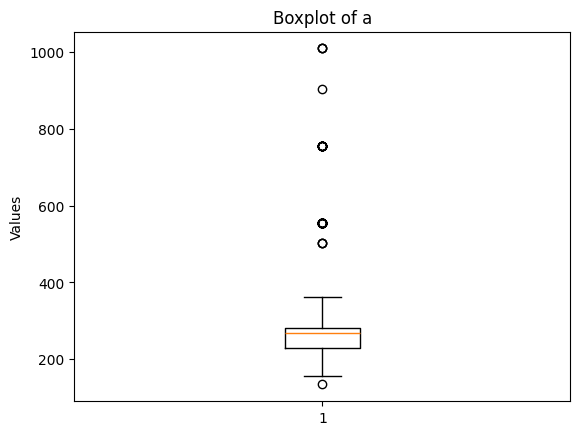

In [102]:
import matplotlib.pyplot as plt

plt.boxplot(arrH)
plt.title('Boxplot of a')
plt.ylabel('Values')
plt.show()

In [103]:
Q1 = np.percentile(arrH, 25)
count_under_Q1 = np.sum(arrH < Q1)
Q1 = round(Q1)

print("Q1:", Q1)
print("Count under Q1:", count_under_Q1)

Q1: 228
Count under Q1: 101


In [104]:
indices_under_Q1 = np.where(arrH < Q1)[0]
print(indices_under_Q1)

[ 21  37  38  49  50  51  52  95 100 101 102 103 112 126 127 160 161 162
 203 204 205 206 212 213 214 217 218 223 224 233 234 240 241 242 243 263
 264 265 266 267 268 269 270 271 359 360 361 362 363 364 365 366 367 368
 369 370 383 384 385 386 387 402 403 404 405 406 407 408 409 415 416 417
 435 436 437 438 439 470 471 472 473 474 475 476 477 478 479 480 481 482
 483 484 485 486 487 488 567 568 569 570 571]


In [105]:
filtered_list = [i for i in range(h5_len) if i not in indices_under_Q1 and i not in arrW]
# print(filtered_list)
keys_list = [f'file_{i+1}' for i in filtered_list]

In [106]:
train_data, temp_data = train_test_split(keys_list, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Output
print("Training Data:", train_data)
print("Validation Data:", val_data)
print("Test Data:", test_data)

data_splits={
    'train_files': train_data,  # 70%
    'val_files'  : val_data,    # 15%
    'test_files' : test_data,   # 15%
    'Q1'         : Q1
}

Training Data: ['file_237', 'file_391', 'file_69', 'file_126', 'file_520', 'file_521', 'file_31', 'file_193', 'file_176', 'file_28', 'file_8', 'file_556', 'file_124', 'file_42', 'file_178', 'file_567', 'file_136', 'file_132', 'file_557', 'file_395', 'file_165', 'file_455', 'file_465', 'file_203', 'file_305', 'file_314', 'file_548', 'file_159', 'file_451', 'file_77', 'file_246', 'file_189', 'file_461', 'file_284', 'file_380', 'file_125', 'file_565', 'file_166', 'file_295', 'file_173', 'file_238', 'file_448', 'file_93', 'file_276', 'file_186', 'file_291', 'file_444', 'file_84', 'file_375', 'file_231', 'file_281', 'file_137', 'file_545', 'file_354', 'file_434', 'file_467', 'file_248', 'file_423', 'file_538', 'file_468', 'file_317', 'file_41', 'file_228', 'file_157', 'file_450', 'file_275', 'file_575', 'file_337', 'file_68', 'file_129', 'file_399', 'file_307', 'file_7', 'file_446', 'file_427', 'file_179', 'file_171', 'file_198', 'file_498', 'file_209', 'file_331', 'file_11', 'file_466', 'f

In [107]:
with open('data_splits.pkl', 'wb') as handle:
    pickle.dump(data_splits, handle)